# 🧠 Computer Vision Basics – Lecture 4.1
#### Topic: YOLO Object Detection Demo  
**Instructor:** Azeem Aslam
<br>
**Institute:** UVAS / NAVTTC

# Part B: YOLO Demo (Object Detection)
###  What is YOLO (simple)

YOLO = a smart model that can detect many objects like:

- person
- car
- bicycle
- phone
- dog

Today we will **use a ready-made YOLO model** (no training).

---

# Option 1 (Recommended for demo): Use Ultralytics YOLOv8
If Ultralytics is not installed, run this once:

In [ ]:
!pip install ultralytics

# Step B1: Run YOLO on an image 
This will:

- download an image
- YOLO finds objects
- draws boxes automatically

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

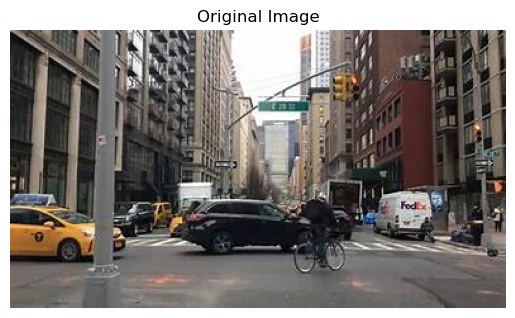

In [3]:
img = cv2.imread("OpenCV/op.jpg")

if img is not None:
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()
else:
    print("Image not read successfully.")

In [4]:
try:
    from ultralytics import YOLO
except Exception as e:
    print("YOLO demo not run. Reason:", e)
    print("Tip: Install with: pip install ultralytics")

In [5]:
# make model
model = YOLO("yolov8n.pt")   #this is fast and small model
print("Model is ready.")

Model is ready.


## Load YOLO Model

```python
model = YOLO("yolov8n.pt")
```

### What is happening?

* Yahan hum **YOLOv8 model load** kar rahe hain.
* `"yolov8n.pt"` = **pre-trained weights file**

### Important points:

* `yolov8n` = **nano model**
* Fastest model
* Light weight
* Thori kam accuracy but **real-time ke liye best**

In [6]:
results = model.predict(source=img  , conf=0.25  , verbose=False)

## Prediction / Detection

```python
results = model.predict(source=img, conf=0.25, verbose=False)
```

### Breakdown 👇

#### 🔸 `source=img`

* `img` = input image
* Ho sakta hai:

  * image path
  * numpy image
  * webcam frame

👉 YOLO isi image par detection karega.

---

#### 🔸 `conf=0.25`

* **Confidence threshold**
* Matlab:

  * Sirf wo objects show honge jinki confidence ≥ 25%

Example:

* confidence = 0.90 → show
* confidence = 0.20 → ignore

👉 False detections kam ho jati hain.

---

#### 🔸 `verbose=False`

* Console par extra logs **print nahi honge**
* Output clean rehta hai

---

### Roman Urdu:

Model image ko scan karta hai aur objects detect karta hai. Sirf woh objects show hotay hain jo 25% se zyada confident hon.


In [7]:
# draw boxes and labels at image
annotated = results[0].plot() 

##  Draw Bounding Boxes

```python
annotated = results[0].plot()
```

### What is `results`?

* `results` = list of detections
* Har image ka result ek index par hota hai

Since hum **1 image** de rahe hain:

```python
results[0]
```

---

### `.plot()`

* Automatically:

  * Bounding boxes draw karta hai
  * Class name likhta hai
  * Confidence score show karta hai

👉 Output = **annotated image**

---

### Roman Urdu:

YOLO ne jo objects detect kiye un par automatically box aur label draw ho jata hai.

---

## 🧠 FLOW SUMMARY (VERY IMPORTANT)

```
Image → YOLO Model → Detection → Bounding Boxes → Annotated Image
```

---

## 📦 Example Output

Agar image me:

* 1 person
* 1 car

YOLO output karega:

* Green / colored boxes
* Text: person (0.87)
* Text: car (0.92)

---

## 🔥 One-Line 

“This code loads a YOLOv8 model, detects objects in an image, and draws bounding boxes with labels.”

---


In [8]:
annotated_rgb = cv2.cvtColor(annotated  , cv2.COLOR_BGR2RGB)

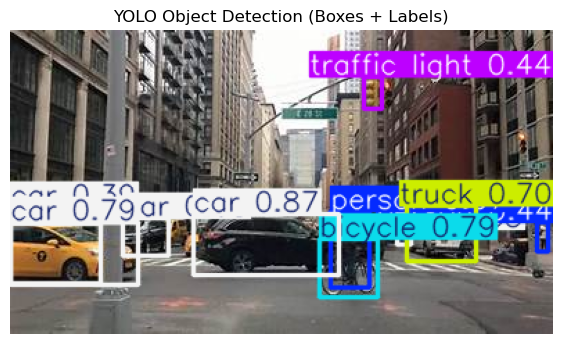

In [9]:
plt.figure(figsize=(7,30))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.title("YOLO Object Detection (Boxes + Labels)")
plt.show()

# Run YOLO on an video 
This will:

- download an video
- YOLO finds objects
- draws boxes automatically

In [10]:
# Vedio Detection

cap = cv2.VideoCapture(0)  # 0 mean default camera

cap = cv2.VideoCapture("OpenCV/vedio.mp4")  # video file name

if not cap.isOpened():
    print("Video not opened. Check file path.")
else:
    print("Video started. Press Q to quit.")

    while True:
        ret , img = cap.read()
        if not ret:
            print("Could not read frame.")
            break
            
        results = model.predict(source=img  , conf=0.25  , verbose=False)

        # draw boxes and labels at image
        annotated = results[0].plot() 
        
        
        cv2.imshow("Live Detection (Press Q to quit)", annotated)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Video started. Press Q to quit.


# Run YOLO on an live camera
This will:

- Start live camera
- YOLO finds objects
- draws boxes automatically

In [11]:
# Live Face Detection

cap = cv2.VideoCapture(0)  # 0 mean default camera

if not cap.isOpened():
    print("Webcam not opened . Try changing 0 to 1 or check camera promissions.")
else:
    print("Webcam started . Pree Q to quit.")

    while True:
        ret , img = cap.read()
        if not ret:
            print("Could not read frame.")
            break
            
        results = model.predict(source=img  , conf=0.25  , verbose=False)

        # draw boxes and labels at image
        annotated = results[0].plot() 
        
        
        cv2.imshow("Live Face Detection (Press Q to quit)", annotated)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Webcam started . Pree Q to quit.
